In [22]:
import pandas as pd
from sqlalchemy import create_engine, text

In [23]:
mysql_user = "user"
mysql_password = "password"
mysql_host = "127.0.0.1"
mysql_port = "3306"
mysql_db = "testdb"


In [ ]:
engine = create_engine(f"mysql+mysqlconnector://{mysql_user}:{mysql_password}@{mysql_host}:{mysql_port}/{mysql_db}")
df = pd.read_sql(text("SELECT * FROM Netflix"), con=engine)

In [ ]:
table_name = "Netflix"

In [26]:
with engine.connect() as conn:
    # Contar filas
    result = conn.execute(text(f"SELECT COUNT(*) FROM {table_name};"))
    count = result.scalar()
    print(f"Número de filas cargadas: {count}")

    # Mostrar as primeiras 5 filas
    result = conn.execute(text(f"SELECT * FROM {table_name} LIMIT 5;"))
    for row in result:
        print(row)

Número de filas cargadas: 8807
('s1', 'Movie', 'Dick Johnson Is Dead', 'Kirsten Johnson', None, 'United States', 'September 25, 2021', 2020, 'PG-13', '90 min', 'Documentaries', 'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.')
('s2', 'TV Show', 'Blood & Water', None, 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mah ... (5 characters truncated) ... , Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng', 'South Africa', 'September 24, 2021', 2021, 'TV-MA', '2 Seasons', 'International TV Shows, TV Dramas, TV Mysteries', 'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.')
('s3', 'TV Show', 'Gan

In [27]:
from pymongo import MongoClient

In [28]:
#Crear conexión a MongoDB
mongo_user = "root"
mongo_password = "rootpassword"
mongo_host = "127.0.0.1"
mongo_port = "27017"

In [29]:
mongo_client = MongoClient(f"mongodb://{mongo_user}:{mongo_password}@{mongo_host}:{mongo_port}/")


In [ ]:
mongo_dns = mongo_client["testdb"]
mongo_collection = mongo_dns["Netflix"]
mongo_collection.insert_many(df.to_dict('records'))


print(mongo_collection.find_one({"show_id": "s2"}))
print("\nNúmero de documentos en la colección:", mongo_collection.count_documents({}))
print("\nPrimeros 5 documentos en la coleccion:")
for doc in mongo_collection.find().limit(5):
    print(doc)

{'_id': ObjectId('69275c6c723dd3bda1d805c2'), 'show_id': 's2', 'type': 'TV Show', 'title': 'Blood & Water', 'director': None, 'cast': 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng', 'country': 'South Africa', 'date_added': 'September 24, 2021', 'release_year': 2021, 'rating': 'TV-MA', 'duration': '2 Seasons', 'listed_in': 'International TV Shows, TV Dramas, TV Mysteries', 'description': 'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'}

Número de documentos en la colección: 88070

Primeros 5 documentos en la coleccion:
{'_id': ObjectId('69275c6c723dd3bda1d805c1'), 'show_id': 's1', 'type': 'Movie', 'title': 'Dick Johnson Is Dead', 'd

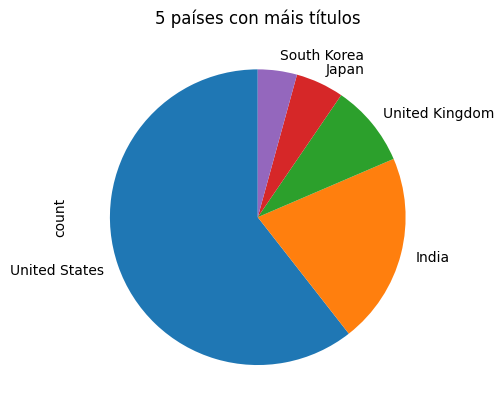

In [67]:
import matplotlib.pyplot as plt

mas_titulos = df['country'].value_counts().head(5)

mas_titulos.plot(kind='pie', startangle=90)
plt.title("5 países con máis títulos")
plt.show()



In [ ]:
#Cerrar la conexión
mongo_client.close()